In [95]:
!pip install --quiet -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [83]:
df_fraude = pd.read_csv('dados_treinamento_fraude.csv')

In [84]:
df_fraude

,Total_Consultas,Idade,Renda_Anual,Score_Credito,Numero_Transacoes,Chances_Fraude,Renda_por_Transacao,Idade_por_Consulta
0,14,71,72245,778.181044,262,1,274.695817,4.733333
1,45,19,37274,756.551684,534,1,69.671028,0.413043
2,29,74,110219,766.125891,461,1,238.569264,2.466667
3,26,61,106199,528.713357,532,0,199.247655,2.259259
4,25,19,64785,497.688457,994,1,65.110553,0.730769
...,...,...,...,...,...,...,...,...
70,24,68,32358,346.518067,675,0,47.866864,2.720000
71,45,72,119204,554.830697,455,0,261.412281,1.565217
72,48,30,97936,751.066940,971,0,100.757202,0.612245
73,14,33,90217,385.931364,664,0,135.664662,2.200000


In [85]:
df_fraude.describe()

,Total_Consultas,Idade,Renda_Anual,Score_Credito,Numero_Transacoes,Chances_Fraude,Renda_por_Transacao,Idade_por_Consulta
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,25.773333,44.773333,102041.826667,571.113634,600.146667,0.546667,181.567062,2.460038
std,14.403991,19.384846,48374.340355,163.498946,205.500424,0.501170,92.116204,1.877116
min,3.000000,18.000000,23174.000000,307.734276,140.000000,0.000000,35.490814,0.372549
25%,13.000000,28.500000,71389.500000,414.140347,455.500000,0.000000,113.253089,0.965116
50%,25.000000,39.000000,105962.000000,589.025813,581.000000,1.000000,177.554717,1.875000
75%,38.000000,60.000000,132391.500000,705.614461,731.000000,1.000000,232.372141,3.414773
max,50.000000,80.000000,199943.000000,849.376298,995.000000,1.000000,510.693333,7.800000


In [86]:
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Total_Consultas      75 non-null     int64  
 1   Idade                75 non-null     int64  
 2   Renda_Anual          75 non-null     int64  
 3   Score_Credito        75 non-null     float64
 4   Numero_Transacoes    75 non-null     int64  
 5   Chances_Fraude       75 non-null     int64  
 6   Renda_por_Transacao  75 non-null     float64
 7   Idade_por_Consulta   75 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 4.8 KB


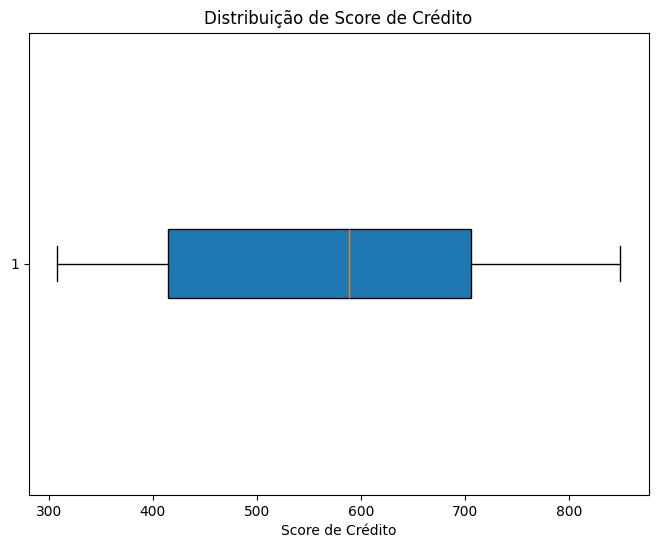

In [87]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_fraude["Score_Credito"], vert=False, patch_artist=True)
plt.title("Distribuição de Score de Crédito")
plt.xlabel("Score de Crédito")
plt.show()


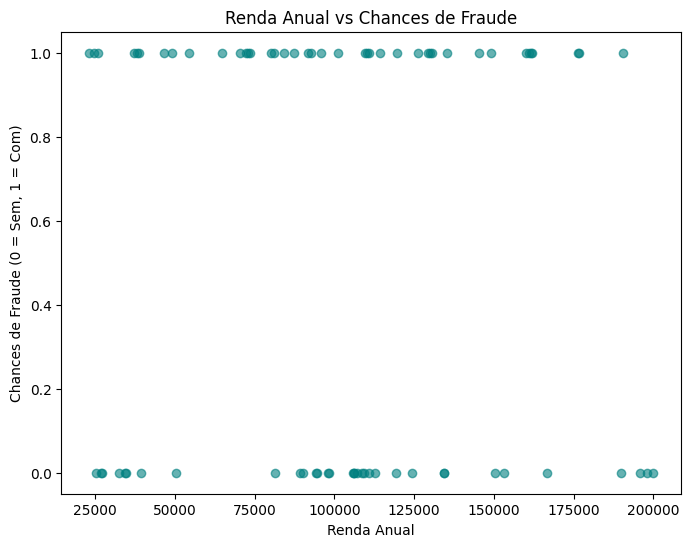

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(df_fraude["Renda_Anual"], df_fraude["Chances_Fraude"], alpha=0.6, color="teal")
plt.title("Renda Anual vs Chances de Fraude")
plt.xlabel("Renda Anual")
plt.ylabel("Chances de Fraude (0 = Sem, 1 = Com)")
plt.show()

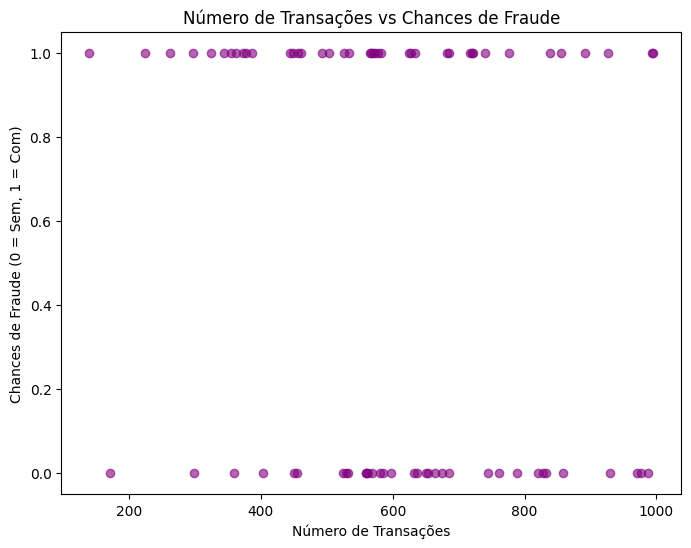

In [89]:
plt.figure(figsize=(8, 6))
plt.scatter(df_fraude["Numero_Transacoes"], df_fraude["Chances_Fraude"], alpha=0.6, color="purple")
plt.title("Número de Transações vs Chances de Fraude")
plt.xlabel("Número de Transações")
plt.ylabel("Chances de Fraude (0 = Sem, 1 = Com)")
plt.show()

In [90]:
X = df_fraude.drop("Chances_Fraude", axis=1)
y = df_fraude["Chances_Fraude"]

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=42, test_size=0.20
)

In [92]:
best_model = LogisticRegression(C=1, solver='lbfgs', random_state=42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
classification_rep = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.2F}%')
print(f'Relatório de Classificação:\n {classification_rep}')

Acurácia: 73.33%
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.70      0.88      0.78         8

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
